# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
# A pandas series can be treated as a numpy array, in this sense
# So slicing, indexing, masking, functions, bla bla
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [3]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
#Basically a series is a glorified python dictionary
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]  #if missing data, then panda will simpy output NaN. Panda automatically align data
print(s)

a   -0.453635
b    0.795112
c    0.732349
d    0.177116
e    0.073752
dtype: float64
a         NaN
b    1.590224
c    1.464698
d    0.354233
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [10]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2024,12,27,10,45,10,15)   #year, month, day, hour, minute, milliseconds
print(date)

# otherwise, several notations are interpreted too
date = 'Nov 27 2024'
# or alternatively
date = '27/11/2024 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
#This (days) is a DatatimeIndex. I guess it's meant to be used like a numpy array of indexes
# Datatime is,however, a Python built-in function. Pandas has its ways
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2024-11-28
2024-12-27 10:45:10.000015
27/11/2024 10:45:00
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-28 10:45:00',
               '2024-11-29 10:45:00', '2024-11-30 10:45:00',
               '2024-12-01 10:45:00', '2024-12-02 10:45:00',
               '2024-12-03 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 10:45:01',
               '2024-11-27 10:45:02', '2024-11-27 10:45:03',
               '2024-11-27 10:45:04', '2024-11-27 10:45:05',
               '2024-11-27 10:45:06', '2024-11-27 10:45:07',
               '2024-11-27 10:45:08', '2024-11-27 10:45:09',
               ...
               '2024-11-27 11:44:50', '2024-11-27 11:44:51',
               '2024-11-27 11:44:52', '2024-11-27 11:44:53',
               '2024-11-27 11:44:54', '2024-11-27 11:44:55',
               '2024-11-27 11:44:56', '2024-11-27 11:44:57',
               '2024-11-27 11:44:58', '2024-11-27 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [12]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
# a lot of flexibility with parsing in
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [13]:
#Here I'm using days, which is a DatatimeIndex (Python built-in)
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2024-11-27':'2024-12-03'], '\n') # Note - includes end time


2024-11-27 10:45:00     9.857378
2024-11-28 10:45:00    10.999262
2024-11-29 10:45:00     9.896237
2024-11-30 10:45:00    10.156629
Freq: D, dtype: float64 

2024-11-27 10:45:00     9.857378
2024-11-28 10:45:00    10.999262
2024-11-29 10:45:00     9.896237
2024-11-30 10:45:00    10.156629
2024-12-01 10:45:00     9.582718
2024-12-02 10:45:00     9.517442
2024-12-03 10:45:00     8.661004
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [14]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame. You can label the rows (indexes) and label the columns (variables name)


Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [23]:
entries=10
dates=pd.date_range('11/27/2024 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2024-11-27 10:45:00,-1.053043,-0.595061,0.110924,0.500579
2024-11-27 11:45:00,-0.566535,-1.368323,-0.792742,-0.184151
2024-11-27 12:45:00,-1.860855,-1.397235,0.498622,-1.462459
2024-11-27 13:45:00,0.389258,1.102233,0.878594,0.647896
2024-11-27 14:45:00,1.326842,-0.119289,-2.388941,0.047806
2024-11-27 15:45:00,0.102705,-1.727899,0.531136,0.168764
2024-11-27 16:45:00,-0.161380,-0.166185,0.623291,1.451852
2024-11-27 17:45:00,-1.010980,0.161903,-0.685005,0.773842
2024-11-27 18:45:00,-0.384269,0.533810,1.903518,-0.933022
2024-11-27 19:45:00,-0.638717,-0.301176,-0.895672,1.328778


or by means of a dictionary:


In [28]:
# note that every column of a data frame is a panda series!!!

df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [29]:
df.head(2)

,A,B,C,D
2024-11-27 10:45:00,-1.053043,-0.595061,0.110924,0.500579
2024-11-27 11:45:00,-0.566535,-1.368323,-0.792742,-0.184151


In [30]:
df.tail(4)

,A,B,C,D
2024-11-27 16:45:00,-0.161380,-0.166185,0.623291,1.451852
2024-11-27 17:45:00,-1.010980,0.161903,-0.685005,0.773842
2024-11-27 18:45:00,-0.384269,0.533810,1.903518,-0.933022
2024-11-27 19:45:00,-0.638717,-0.301176,-0.895672,1.328778


In [31]:
df.index

DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 11:45:00',
               '2024-11-27 12:45:00', '2024-11-27 13:45:00',
               '2024-11-27 14:45:00', '2024-11-27 15:45:00',
               '2024-11-27 16:45:00', '2024-11-27 17:45:00',
               '2024-11-27 18:45:00', '2024-11-27 19:45:00'],
              dtype='datetime64[ns]', freq='h')

In [32]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [38]:
df.values
# this is a numpy ndarray

array([[-1.05304282, -0.59506082,  0.11092408,  0.50057921],
       [-0.56653454, -1.36832276, -0.79274172, -0.18415102],
       [-1.86085467, -1.39723512,  0.49862239, -1.46245897],
       [ 0.38925771,  1.10223254,  0.87859392,  0.6478959 ],
       [ 1.32684233, -0.11928933, -2.38894117,  0.04780556],
       [ 0.10270506, -1.72789851,  0.53113622,  0.16876352],
       [-0.16138033, -0.16618465,  0.62329135,  1.45185239],
       [-1.01098049,  0.1619032 , -0.68500533,  0.77384183],
       [-0.38426918,  0.53381043,  1.9035184 , -0.9330221 ],
       [-0.63871711, -0.30117596, -0.89567184,  1.32877772]])

In [39]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.385697,-0.387722,-0.021627,0.233988
std,0.877582,0.901829,1.198568,0.923110
min,-1.860855,-1.727899,-2.388941,-1.462459
25%,-0.917915,-1.175007,-0.765808,-0.126162
50%,-0.475402,-0.233680,0.304773,0.334671
75%,0.036684,0.091605,0.600253,0.742355
max,1.326842,1.102233,1.903518,1.451852


In [42]:
#simple transpose
# If dataset is really large, better not to. Panda is built to handle large datasets with a small amount of columns and large amount of rows
df.T

,2024-11-27 10:45:00,2024-11-27 11:45:00,2024-11-27 12:45:00,2024-11-27 13:45:00,2024-11-27 14:45:00,2024-11-27 15:45:00,2024-11-27 16:45:00,2024-11-27 17:45:00,2024-11-27 18:45:00,2024-11-27 19:45:00
A,-1.053043,-0.566535,-1.860855,0.389258,1.326842,0.102705,-0.161380,-1.010980,-0.384269,-0.638717
B,-0.595061,-1.368323,-1.397235,1.102233,-0.119289,-1.727899,-0.166185,0.161903,0.533810,-0.301176
C,0.110924,-0.792742,0.498622,0.878594,-2.388941,0.531136,0.623291,-0.685005,1.903518,-0.895672
D,0.500579,-0.184151,-1.462459,0.647896,0.047806,0.168764,1.451852,0.773842,-0.933022,1.328778


In [50]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2024-11-27 10:45:00,-1.053043,-0.595061,0.110924,0.500579
2024-11-27 11:45:00,-0.566535,-1.368323,-0.792742,-0.184151
2024-11-27 12:45:00,-1.860855,-1.397235,0.498622,-1.462459
2024-11-27 13:45:00,0.389258,1.102233,0.878594,0.647896
2024-11-27 14:45:00,1.326842,-0.119289,-2.388941,0.047806
2024-11-27 15:45:00,0.102705,-1.727899,0.531136,0.168764
2024-11-27 16:45:00,-0.161380,-0.166185,0.623291,1.451852
2024-11-27 17:45:00,-1.010980,0.161903,-0.685005,0.773842
2024-11-27 18:45:00,-0.384269,0.533810,1.903518,-0.933022
2024-11-27 19:45:00,-0.638717,-0.301176,-0.895672,1.328778


In [44]:
df.sort_values(by="C")

,A,B,C,D
2024-11-27 14:45:00,1.326842,-0.119289,-2.388941,0.047806
2024-11-27 19:45:00,-0.638717,-0.301176,-0.895672,1.328778
2024-11-27 11:45:00,-0.566535,-1.368323,-0.792742,-0.184151
2024-11-27 17:45:00,-1.010980,0.161903,-0.685005,0.773842
2024-11-27 10:45:00,-1.053043,-0.595061,0.110924,0.500579
2024-11-27 12:45:00,-1.860855,-1.397235,0.498622,-1.462459
2024-11-27 15:45:00,0.102705,-1.727899,0.531136,0.168764
2024-11-27 16:45:00,-0.161380,-0.166185,0.623291,1.451852
2024-11-27 13:45:00,0.389258,1.102233,0.878594,0.647896
2024-11-27 18:45:00,-0.384269,0.533810,1.903518,-0.933022


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [51]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2024-11-27 10:45:00   -1.053043
2024-11-27 11:45:00   -0.566535
2024-11-27 12:45:00   -1.860855
2024-11-27 13:45:00    0.389258
2024-11-27 14:45:00    1.326842
2024-11-27 15:45:00    0.102705
2024-11-27 16:45:00   -0.161380
2024-11-27 17:45:00   -1.010980
2024-11-27 18:45:00   -0.384269
2024-11-27 19:45:00   -0.638717
Freq: h, Name: A, dtype: float64 

2024-11-27 10:45:00   -1.053043
2024-11-27 11:45:00   -0.566535
2024-11-27 12:45:00   -1.860855
2024-11-27 13:45:00    0.389258
2024-11-27 14:45:00    1.326842
2024-11-27 15:45:00    0.102705
2024-11-27 16:45:00   -0.161380
2024-11-27 17:45:00   -1.010980
2024-11-27 18:45:00   -0.384269
2024-11-27 19:45:00   -0.638717
Freq: h, Name: A, dtype: float64


In [52]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2024-11-27 10:45:00":"2024-11-27 12:45:00"])

                            A         B         C         D
2024-11-27 10:45:00 -1.053043 -0.595061  0.110924  0.500579
2024-11-27 11:45:00 -0.566535 -1.368323 -0.792742 -0.184151
2024-11-27 12:45:00 -1.860855 -1.397235  0.498622 -1.462459
                            A         B         C         D
2024-11-27 10:45:00 -1.053043 -0.595061  0.110924  0.500579
2024-11-27 11:45:00 -0.566535 -1.368323 -0.792742 -0.184151
2024-11-27 12:45:00 -1.860855 -1.397235  0.498622 -1.462459


### Selection by label

In [54]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]
#loc is not actually a method

A   -1.053043
B   -0.595061
C    0.110924
D    0.500579
Name: 2024-11-27 10:45:00, dtype: float64

In [55]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]  #all of the rows, but just the two columns
#a=df.loc[:,['A','B']]

,A,B
2024-11-27 10:45:00,-1.053043,-0.595061
2024-11-27 11:45:00,-0.566535,-1.368323
2024-11-27 12:45:00,-1.860855,-1.397235
2024-11-27 13:45:00,0.389258,1.102233
2024-11-27 14:45:00,1.326842,-0.119289
2024-11-27 15:45:00,0.102705,-1.727899
2024-11-27 16:45:00,-0.161380,-0.166185
2024-11-27 17:45:00,-1.010980,0.161903
2024-11-27 18:45:00,-0.384269,0.533810
2024-11-27 19:45:00,-0.638717,-0.301176


In [56]:
# showing label slicing, both endpoints are included:
df.loc['2024-11-27 14:45:00':'2024-11-27 16:45:00',['A','B']]

,A,B
2024-11-27 14:45:00,1.326842,-0.119289
2024-11-27 15:45:00,0.102705,-1.727899
2024-11-27 16:45:00,-0.161380,-0.166185


In [57]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.5665345352442022
-0.5665345352442022


### Selecting by position

In [58]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.389258
B    1.102233
C    0.878594
D    0.647896
Name: 2024-11-27 13:45:00, dtype: float64 

                            A         B
2024-11-27 13:45:00  0.389258  1.102233
2024-11-27 14:45:00  1.326842 -0.119289


In [59]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2024-11-27 11:45:00,-0.566535,-0.792742
2024-11-27 12:45:00,-1.860855,0.498622
2024-11-27 14:45:00,1.326842,-2.388941


In [60]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

# selecting an individual element by position
print(df.iloc[1,1])

                            A         B         C         D
2024-11-27 11:45:00 -0.566535 -1.368323 -0.792742 -0.184151
2024-11-27 12:45:00 -1.860855 -1.397235  0.498622 -1.462459 

                            B         C
2024-11-27 10:45:00 -0.595061  0.110924
2024-11-27 11:45:00 -1.368323 -0.792742
2024-11-27 12:45:00 -1.397235  0.498622
2024-11-27 13:45:00  1.102233  0.878594
2024-11-27 14:45:00 -0.119289 -2.388941
2024-11-27 15:45:00 -1.727899  0.531136
2024-11-27 16:45:00 -0.166185  0.623291
2024-11-27 17:45:00  0.161903 -0.685005
2024-11-27 18:45:00  0.533810  1.903518
2024-11-27 19:45:00 -0.301176 -0.895672
-1.3683227625368939


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [64]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2024-11-27 13:45:00,0.389258,1.102233,0.878594,0.647896
2024-11-27 17:45:00,-1.010980,0.161903,-0.685005,0.773842
2024-11-27 18:45:00,-0.384269,0.533810,1.903518,-0.933022


In [67]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]     # if this condition is not satisfied, in this case, a NaN is put. The difference is that, here, we apply a mask on the whole dataframe

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2024-11-27 10:45:00,NaN,NaN,0.110924,0.500579
2024-11-27 11:45:00,NaN,NaN,NaN,NaN
2024-11-27 12:45:00,NaN,NaN,0.498622,NaN
2024-11-27 13:45:00,0.389258,1.102233,0.878594,0.647896
2024-11-27 14:45:00,1.326842,NaN,NaN,0.047806
2024-11-27 15:45:00,0.102705,NaN,0.531136,0.168764
2024-11-27 16:45:00,NaN,NaN,0.623291,1.451852
2024-11-27 17:45:00,NaN,0.161903,NaN,0.773842
2024-11-27 18:45:00,NaN,0.533810,1.903518,NaN
2024-11-27 19:45:00,NaN,NaN,NaN,1.328778


### Setting

Combination of selection and setting of values

In [69]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

,A,B,C,D,E,E prime
2024-11-27 10:45:00,0.000000,-0.595061,0.110924,5.0,0.0,0
2024-11-27 11:45:00,-0.566535,-1.368323,-0.792742,5.0,0.5,2
2024-11-27 12:45:00,-1.860855,-1.397235,0.498622,5.0,1.0,4
2024-11-27 13:45:00,0.389258,1.102233,0.878594,5.0,1.5,6
2024-11-27 14:45:00,1.326842,-0.119289,-2.388941,5.0,2.0,8
2024-11-27 15:45:00,0.102705,-1.727899,0.531136,5.0,2.5,10
2024-11-27 16:45:00,-0.161380,-0.166185,0.623291,5.0,3.0,12
2024-11-27 17:45:00,-1.010980,0.161903,-0.685005,5.0,3.5,14
2024-11-27 18:45:00,-0.384269,0.533810,1.903518,5.0,4.0,16
2024-11-27 19:45:00,-0.638717,-0.301176,-0.895672,5.0,4.5,18


In [70]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.595061,0.110924,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.566535,-1.368323,-0.792742,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.860855,-1.397235,0.498622,5.0,1.0,4,0.999848
2024-11-27 13:45:00,0.389258,1.102233,0.878594,5.0,1.5,6,0.999657
2024-11-27 14:45:00,1.326842,-0.119289,-2.388941,5.0,2.0,8,0.999391
2024-11-27 15:45:00,0.102705,-1.727899,0.531136,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-0.161380,-0.166185,0.623291,5.0,3.0,12,0.998630
2024-11-27 17:45:00,-1.010980,0.161903,-0.685005,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-0.384269,0.533810,1.903518,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-0.638717,-0.301176,-0.895672,5.0,4.5,18,0.996917


In [71]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.595061,-0.110924,-5.0,0.0,0,-1.000000
2024-11-27 11:45:00,-0.566535,-1.368323,-0.792742,-5.0,-0.5,-2,-0.999962
2024-11-27 12:45:00,-1.860855,-1.397235,-0.498622,-5.0,-1.0,-4,-0.999848
2024-11-27 13:45:00,-0.389258,-1.102233,-0.878594,-5.0,-1.5,-6,-0.999657
2024-11-27 14:45:00,-1.326842,-0.119289,-2.388941,-5.0,-2.0,-8,-0.999391
2024-11-27 15:45:00,-0.102705,-1.727899,-0.531136,-5.0,-2.5,-10,-0.999048
2024-11-27 16:45:00,-0.161380,-0.166185,-0.623291,-5.0,-3.0,-12,-0.998630
2024-11-27 17:45:00,-1.010980,-0.161903,-0.685005,-5.0,-3.5,-14,-0.998135
2024-11-27 18:45:00,-0.384269,-0.533810,-1.903518,-5.0,-4.0,-16,-0.997564
2024-11-27 19:45:00,-0.638717,-0.301176,-0.895672,-5.0,-4.5,-18,-0.996917


### Are you dealing with a Copy or a View?

In general is hard to tell..

In [72]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`

print (dfd)

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`

print (dfd)



     a  b
0  100  4
1    2  5
2    3  6
     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `df["foo"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [73]:
dfd["a"][dfd["b"] > 5] = 100
dfd

/tmp/ipykernel_14293/449088826.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfd["a"][dfd["b"] > 5] = 100


,a,b
0,100,4
1,2,5
2,100,6


With copy on write this can be done by using `loc`

In [74]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

,a,b
0,100,4
1,2,5
2,200,6


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [ ]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

In [ ]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

In [ ]:
df

In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2024-11-27 18:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [75]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,0.110924,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,NaN,NaN,NaN,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,NaN,NaN,0.498622,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,0.389258,1.102233,0.878594,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.326842,NaN,NaN,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,0.102705,NaN,0.531136,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,NaN,NaN,0.623291,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,NaN,0.161903,NaN,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,NaN,0.533810,1.903518,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,NaN,NaN,NaN,5.0,4.5,18.0,0.996917


In [76]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2024-11-27 13:45:00,0.389258,1.102233,0.878594,5.0,1.5,6.0,0.999657


In [79]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,True,True,False,False,True,True,False
2024-11-27 11:45:00,True,True,True,False,False,False,False
2024-11-27 12:45:00,True,True,False,False,False,False,False
2024-11-27 13:45:00,False,False,False,False,False,False,False
2024-11-27 14:45:00,False,True,True,False,False,False,False
2024-11-27 15:45:00,False,True,False,False,False,False,False
2024-11-27 16:45:00,True,True,False,False,False,False,False
2024-11-27 17:45:00,True,False,True,False,False,False,False
2024-11-27 18:45:00,True,False,False,False,False,False,False
2024-11-27 19:45:00,True,True,True,False,False,False,False


In [81]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,0.000000,0.110924,5.0,0.0,0.0,1.000000
2024-11-27 11:45:00,0.000000,0.000000,0.000000,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,0.000000,0.000000,0.498622,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,0.389258,1.102233,0.878594,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.326842,0.000000,0.000000,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,0.102705,0.000000,0.531136,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,0.000000,0.000000,0.623291,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.000000,0.161903,0.000000,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,0.000000,0.533810,1.903518,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,0.000000,0.000000,0.000000,5.0,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [82]:
#this may be dangereous

df_wNan.fillna(method='pad')

/tmp/ipykernel_14293/1287198679.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wNan.fillna(method='pad')


,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,0.110924,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,NaN,NaN,0.110924,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,NaN,NaN,0.498622,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,0.389258,1.102233,0.878594,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.326842,1.102233,0.878594,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,0.102705,1.102233,0.531136,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,0.102705,1.102233,0.623291,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.102705,0.161903,0.623291,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,0.102705,0.533810,1.903518,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,0.102705,0.533810,1.903518,5.0,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [83]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.280393
B         -0.387722
C         -0.021627
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2024-11-27 10:45:00    0.787980
2024-11-27 11:45:00    0.824623
2024-11-27 12:45:00    1.177197
2024-11-27 13:45:00    2.267106
2024-11-27 14:45:00    2.116858
2024-11-27 15:45:00    2.486427
2024-11-27 16:45:00    3.042051
2024-11-27 17:45:00    3.137722
2024-11-27 18:45:00    4.007232
2024-11-27 19:45:00    3.808765
Freq: h, dtype: float64 



In [84]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.595061,0.110924,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.566535,-1.963384,-0.681818,10.0,0.5,2,1.999962
2024-11-27 12:45:00,-2.427389,-3.360619,-0.183195,15.0,1.5,6,2.999810
2024-11-27 13:45:00,-2.038131,-2.258386,0.695399,20.0,3.0,12,3.999467
2024-11-27 14:45:00,-0.711289,-2.377675,-1.693542,25.0,5.0,20,4.998858
2024-11-27 15:45:00,-0.608584,-4.105574,-1.162406,30.0,7.5,30,5.997906
2024-11-27 16:45:00,-0.769964,-4.271759,-0.539115,35.0,10.5,42,6.996536
2024-11-27 17:45:00,-1.780945,-4.109855,-1.224120,40.0,14.0,56,7.994670
2024-11-27 18:45:00,-2.165214,-3.576045,0.679398,45.0,18.0,72,8.992234
2024-11-27 19:45:00,-2.803931,-3.877221,-0.216274,50.0,22.5,90,9.989152


In [86]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.595061,0.110924,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.566535,-1.368323,-0.792742,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.860855,-1.397235,0.498622,5.0,1.0,4,0.999848
2024-11-27 13:45:00,0.389258,1.102233,0.878594,5.0,1.5,6,0.999657
2024-11-27 14:45:00,1.326842,-0.119289,-2.388941,5.0,2.0,8,0.999391
2024-11-27 15:45:00,0.102705,-1.727899,0.531136,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-0.161380,-0.166185,0.623291,5.0,3.0,12,0.998630
2024-11-27 17:45:00,-1.010980,0.161903,-0.685005,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-0.384269,0.533810,1.903518,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-0.638717,-0.301176,-0.895672,5.0,4.5,18,0.996917


In [87]:
df.apply(lambda x: x.max() - x.min())

A           3.187697
B           2.830131
C           4.292460
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [2]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
import pandas as pd
file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
data['timens']

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [88]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.639906,-0.296075,-0.314446,-1.903529
1,1.273590,0.884333,-0.408196,-0.462811
2,0.167770,-1.328089,0.753500,0.144823
3,-1.173978,-1.580039,0.089916,0.125482
4,-0.482641,-1.336022,0.519234,-0.870431
5,0.358984,1.323063,0.903018,-0.983525
6,0.018211,-0.281256,-0.696794,-0.655317
7,1.602286,0.903006,1.105775,0.360942
8,1.135256,1.799275,-2.653358,-1.656738
9,0.325956,-0.752220,1.774158,0.084296


In [89]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.639906 -0.296075 -0.314446 -1.903529
 1  1.273590  0.884333 -0.408196 -0.462811
 2  0.167770 -1.328089  0.753500  0.144823,
           0         1         2         3
 3 -1.173978 -1.580039  0.089916  0.125482
 4 -0.482641 -1.336022  0.519234 -0.870431
 5  0.358984  1.323063  0.903018 -0.983525
 6  0.018211 -0.281256 -0.696794 -0.655317,
           0         1         2         3
 7  1.602286  0.903006  1.105775  0.360942
 8  1.135256  1.799275 -2.653358 -1.656738
 9  0.325956 -0.752220  1.774158  0.084296]

In [90]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.639906,-0.296075,-0.314446,-1.903529
1,1.273590,0.884333,-0.408196,-0.462811
2,0.167770,-1.328089,0.753500,0.144823
3,-1.173978,-1.580039,0.089916,0.125482
4,-0.482641,-1.336022,0.519234,-0.870431
5,0.358984,1.323063,0.903018,-0.983525
6,0.018211,-0.281256,-0.696794,-0.655317
7,1.602286,0.903006,1.105775,0.360942
8,1.135256,1.799275,-2.653358,-1.656738
9,0.325956,-0.752220,1.774158,0.084296


In [91]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,0.639906,-0.296075,-0.314446,-1.903529
1,1.273590,0.884333,-0.408196,-0.462811
2,0.167770,-1.328089,0.753500,0.144823
3,-1.173978,-1.580039,0.089916,0.125482
4,-0.482641,-1.336022,0.519234,-0.870431
5,0.358984,1.323063,0.903018,-0.983525
6,0.018211,-0.281256,-0.696794,-0.655317
7,1.602286,0.903006,1.105775,0.360942
8,1.135256,1.799275,-2.653358,-1.656738
9,0.325956,-0.752220,1.774158,0.084296


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [92]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
print(result)

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [95]:
result = pd.merge(df1, df2, on='id', how='left')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [ ]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)

`join` is similar to `merge` but uses index as key and has 'Left' as default

In [ ]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [26]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)
print(df.head(10))
# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


  Category  Values
0        A      10
1        B      20
2        A      30
3        B      40
4        A      50
5        C      60
          Values
Category        
A             90
B             60
C             60


In [27]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

         Values      
            sum  mean
Category             
A            90  30.0
B            60  30.0
C            60  60.0


In [28]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]}
                 )
print(df)
result = df.groupby(['Category', 'Type']).sum()
print(result)


  Category Type  Values
0        A    X      10
1        A    Y      20
2        B    X      30
3        B    Y      40
4        C    X      50
5        C    Y      60
               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [ ]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

In [ ]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

In [ ]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

In [ ]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [97]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -1.221421
       two      -1.895299
baz    one       1.231154
       two       0.112872
foo    one      -0.315545
       two       0.244815
qux    one      -2.163270
       two       1.446561
dtype: float64


In [ ]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

<Axes: >

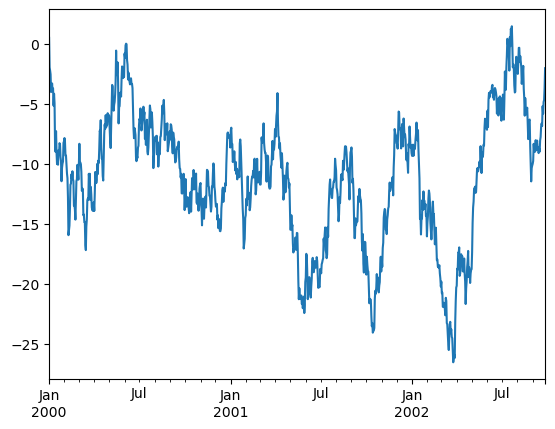

In [98]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

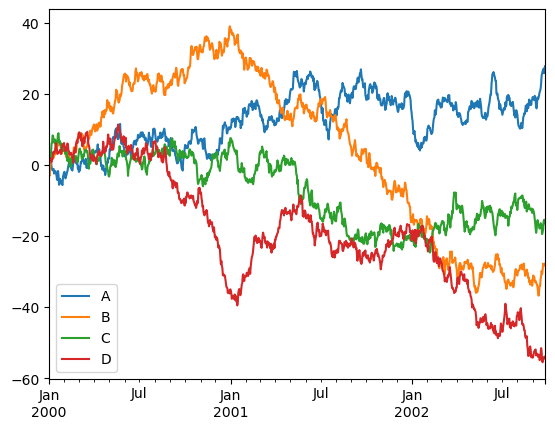

In [99]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')